In [135]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
df = pd.read_csv(".\datasets\inventory_data_noisy.csv")

In [137]:
df.head()

,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location
0,D000,P000,2022-01-01,62.0,8.0,Chicago
1,D000,P000,2022-01-02,70.0,9.0,Chicago
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles


In [138]:
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18011 entries, 0 to 18343
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Dealer_ID    18011 non-null  object 
 1   Product_ID   18011 non-null  object 
 2   Date         18011 non-null  object 
 3   Quantity     17919 non-null  float64
 4   Consumption  17919 non-null  float64
 5   Location     17827 non-null  object 
dtypes: float64(2), object(4)
memory usage: 985.0+ KB


In [139]:
df["Quantity"] = df["Quantity"].fillna(df["Quantity"].median())
df["Consumption"] = df["Consumption"].fillna(df["Consumption"].median())
df["Location"] = df["Location"].fillna(df["Location"].mode()[0])

df["Date"] = pd.to_datetime(df["Date"],errors="coerce")
df["Date"] = df["Date"].fillna(df["Date"].mode()[0])

In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18011 entries, 0 to 18343
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Dealer_ID    18011 non-null  object        
 1   Product_ID   18011 non-null  object        
 2   Date         18011 non-null  datetime64[ns]
 3   Quantity     18011 non-null  float64       
 4   Consumption  18011 non-null  float64       
 5   Location     18011 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 985.0+ KB


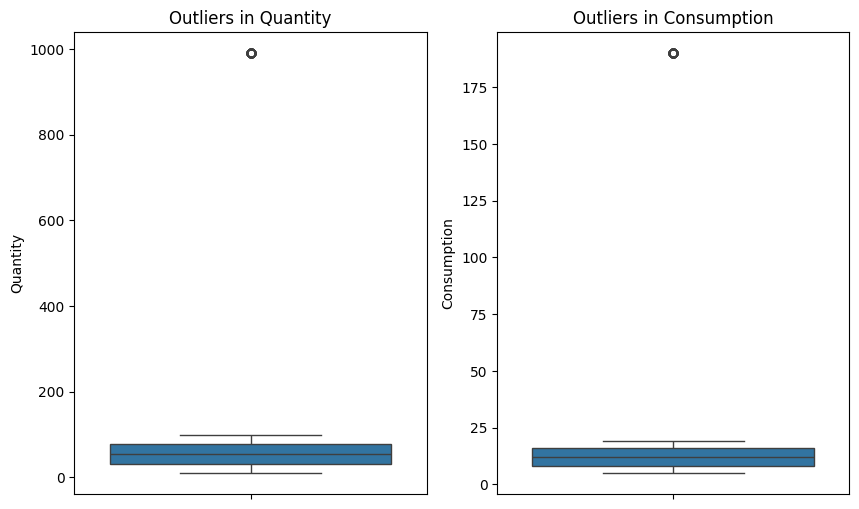

In [141]:
plt.figure(figsize = (10,6))
plt.subplot(121)
sns.boxplot(data=df,y="Quantity")
plt.title("Outliers in Quantity")
plt.subplot(122)
sns.boxplot(data=df,y="Consumption")
plt.title("Outliers in Consumption")
plt.show()

In [142]:
def getOutlierOfCol(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col]>lower_bound) & (df[col]>upper_bound)].index
    return outliers

outliers_of_quantity = getOutlierOfCol(df,"Quantity")
outliers_of_consumption = getOutlierOfCol(df,"Quantity")

In [143]:
df = df.drop(index = (outliers_of_quantity | outliers_of_consumption))

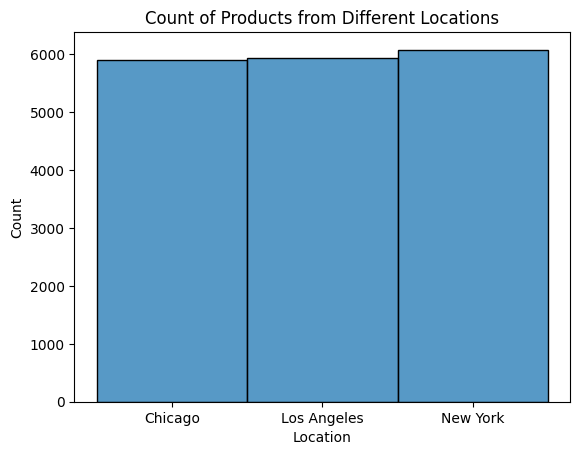

In [144]:
sns.histplot(data = df,x = "Location")
plt.title("Count of Products from Different Locations")
plt.show()

In [145]:
df["Consumption_percentage"] = (df["Consumption"] / df["Quantity"]) *100
df.head()


,Dealer_ID,Product_ID,Date,Quantity,Consumption,Location,Consumption_percentage
0,D000,P000,2022-01-01,62.0,8.0,Chicago,12.903226
1,D000,P000,2022-01-02,70.0,9.0,Chicago,12.857143
2,D000,P000,2022-01-03,12.0,17.0,Los Angeles,141.666667
3,D000,P000,2022-01-04,74.0,13.0,Los Angeles,17.567568
4,D000,P000,2022-01-05,57.0,10.0,Los Angeles,17.543860


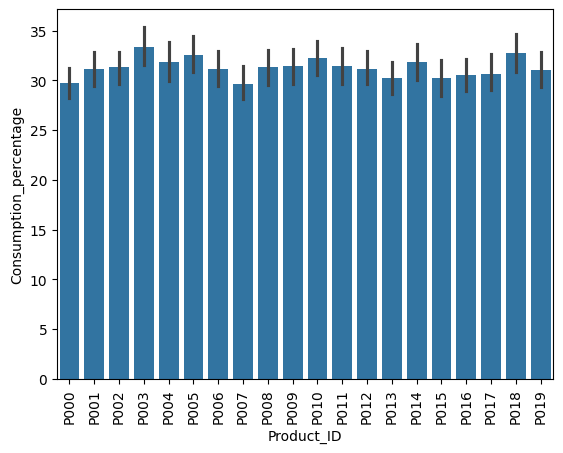

In [146]:
sns.barplot(data = df,x = "Product_ID", y = "Consumption_percentage")
plt.xticks(rotation=90)
plt.show()

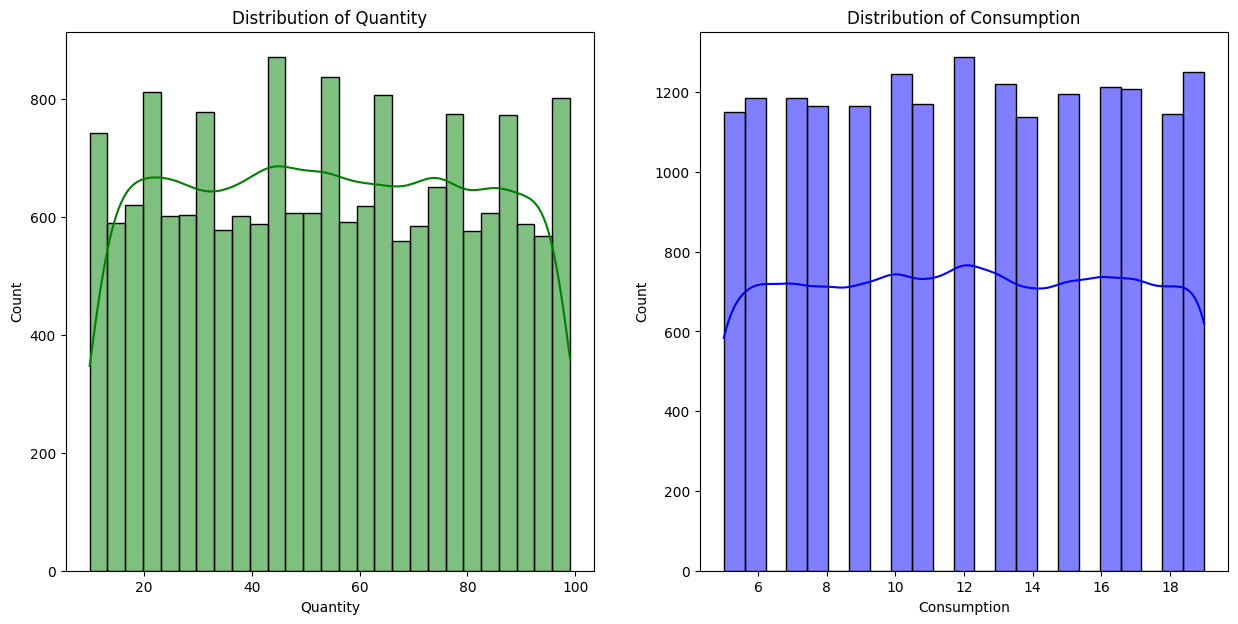

In [147]:
plt.figure(figsize = (15,7))

plt.subplot(1, 2, 1)
sns.histplot(df['Quantity'], kde=True, color='green')
plt.title('Distribution of Quantity')

plt.subplot(1, 2, 2)
sns.histplot(df['Consumption'], kde=True, color='blue')
plt.title('Distribution of Consumption')

plt.show()

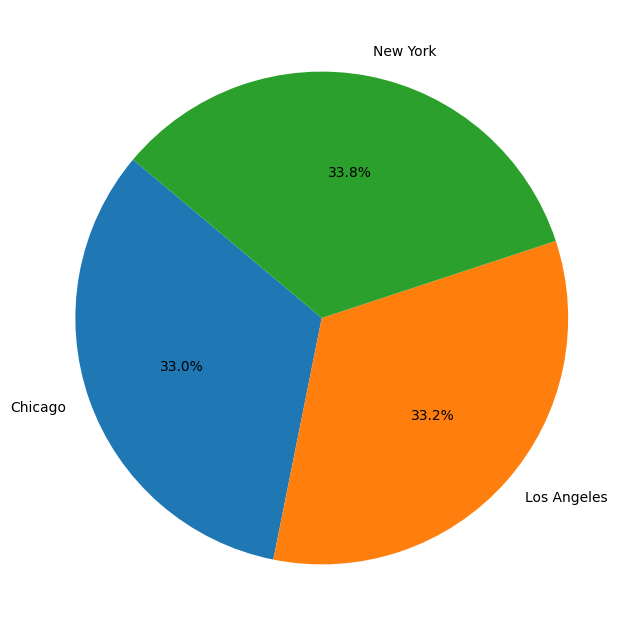

In [152]:
avg_consumption_rate = df.groupby("Location")["Consumption_percentage"].mean()

labels = avg_consumption_rate.index
values =  avg_consumption_rate.values

plt.figure(figsize=(8, 8)) 
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140)

plt.show()